Imports

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, losses, regularizers
import matplotlib.pyplot as plt


Load mnist and reshape

In [2]:
mnist = datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)


Reduce train data



In [3]:
max_per_class = 10
counter = {}
min_x_train = []
min_y_train = []

for i in range(len(y_train)):
    if y_train[i] not in counter:
        counter[y_train[i]] = 0
    if counter[y_train[i]] == max_per_class:
        continue
    min_x_train.append(x_train[i])
    min_y_train.append(y_train[i])
    counter[y_train[i]] += 1

x_train = np.array(min_x_train)
y_train = np.array(min_y_train)

Create model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(layers.Dropout(0.9))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.002)))

model.summary()

model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

Train

In [5]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Epoch 1/400
4/4 [==============================] - 5s 1s/step - loss: 2.9263 - accuracy: 0.0900 - val_loss: 2.7604 - val_accuracy: 0.1161
Epoch 2/400
4/4 [==============================] - 3s 914ms/step - loss: 2.8475 - accuracy: 0.1000 - val_loss: 2.7465 - val_accuracy: 0.1815
Epoch 3/400
4/4 [==============================] - 3s 889ms/step - loss: 2.8208 - accuracy: 0.1300 - val_loss: 2.7329 - val_accuracy: 0.2118
Epoch 4/400
4/4 [==============================] - 2s 809ms/step - loss: 2.7423 - accuracy: 0.1000 - val_loss: 2.7232 - val_accuracy: 0.2047
Epoch 5/400
4/4 [==============================] - 3s 878ms/step - loss: 2.7344 - accuracy: 0.1300 - val_loss: 2.7157 - val_accuracy: 0.1831
Epoch 6/400
4/4 [==============================] - 3s 873ms/step - loss: 2.7270 - accuracy: 0.0800 - val_loss: 2.7074 - val_accuracy: 0.2300
Epoch 7/400
4/4 [==============================] - 3s 872ms/step - loss: 2.7158 - accuracy: 0.0800 - val_loss: 2.6999 - val_accuracy: 0.2344
Epoch 8/400
4/4 

Epoch 59/400
4/4 [==============================] - 2s 651ms/step - loss: 1.8256 - accuracy: 0.4700 - val_loss: 1.9323 - val_accuracy: 0.6701
Epoch 60/400
4/4 [==============================] - 2s 791ms/step - loss: 1.8479 - accuracy: 0.4700 - val_loss: 1.9284 - val_accuracy: 0.6808
Epoch 61/400
4/4 [==============================] - 3s 822ms/step - loss: 1.8858 - accuracy: 0.4100 - val_loss: 1.9167 - val_accuracy: 0.6888
Epoch 62/400
4/4 [==============================] - 2s 801ms/step - loss: 1.8573 - accuracy: 0.4400 - val_loss: 1.8956 - val_accuracy: 0.6851
Epoch 63/400
4/4 [==============================] - 2s 792ms/step - loss: 1.8877 - accuracy: 0.4100 - val_loss: 1.8881 - val_accuracy: 0.6880
Epoch 64/400
4/4 [==============================] - 3s 843ms/step - loss: 1.8724 - accuracy: 0.5000 - val_loss: 1.9019 - val_accuracy: 0.6917
Epoch 65/400
4/4 [==============================] - 2s 755ms/step - loss: 1.8166 - accuracy: 0.4700 - val_loss: 1.8883 - val_accuracy: 0.6884
Epoch 

4/4 [==============================] - 2s 690ms/step - loss: 1.2472 - accuracy: 0.7000 - val_loss: 1.3219 - val_accuracy: 0.7518
Epoch 117/400
4/4 [==============================] - 2s 697ms/step - loss: 1.2981 - accuracy: 0.7100 - val_loss: 1.3140 - val_accuracy: 0.7506
Epoch 118/400
4/4 [==============================] - 2s 811ms/step - loss: 1.2670 - accuracy: 0.7000 - val_loss: 1.3195 - val_accuracy: 0.7618
Epoch 119/400
4/4 [==============================] - 2s 701ms/step - loss: 1.0000 - accuracy: 0.7700 - val_loss: 1.3180 - val_accuracy: 0.7705
Epoch 120/400
4/4 [==============================] - 2s 699ms/step - loss: 1.2284 - accuracy: 0.7300 - val_loss: 1.3166 - val_accuracy: 0.7721
Epoch 121/400
4/4 [==============================] - 2s 701ms/step - loss: 1.2204 - accuracy: 0.7300 - val_loss: 1.3119 - val_accuracy: 0.7697
Epoch 122/400
4/4 [==============================] - 2s 678ms/step - loss: 1.1122 - accuracy: 0.7500 - val_loss: 1.3042 - val_accuracy: 0.7611
Epoch 123/400

4/4 [==============================] - 2s 679ms/step - loss: 1.3320 - accuracy: 0.6800 - val_loss: 1.2005 - val_accuracy: 0.7947
Epoch 174/400
4/4 [==============================] - 2s 662ms/step - loss: 0.9115 - accuracy: 0.8000 - val_loss: 1.2017 - val_accuracy: 0.7967
Epoch 175/400
4/4 [==============================] - 2s 691ms/step - loss: 0.9225 - accuracy: 0.7700 - val_loss: 1.2162 - val_accuracy: 0.7978
Epoch 176/400
4/4 [==============================] - 2s 695ms/step - loss: 0.9410 - accuracy: 0.8000 - val_loss: 1.1991 - val_accuracy: 0.7970
Epoch 177/400
4/4 [==============================] - 2s 660ms/step - loss: 0.8292 - accuracy: 0.8500 - val_loss: 1.1706 - val_accuracy: 0.7937
Epoch 178/400
4/4 [==============================] - 2s 663ms/step - loss: 0.8673 - accuracy: 0.8400 - val_loss: 1.1479 - val_accuracy: 0.7894
Epoch 179/400
4/4 [==============================] - 2s 684ms/step - loss: 0.7774 - accuracy: 0.8100 - val_loss: 1.1348 - val_accuracy: 0.7865
Epoch 180/400

4/4 [==============================] - 3s 886ms/step - loss: 0.6837 - accuracy: 0.8800 - val_loss: 1.0540 - val_accuracy: 0.7871
Epoch 231/400
4/4 [==============================] - 2s 771ms/step - loss: 0.7440 - accuracy: 0.8600 - val_loss: 1.0542 - val_accuracy: 0.7848
Epoch 232/400
4/4 [==============================] - 2s 792ms/step - loss: 0.8113 - accuracy: 0.8100 - val_loss: 1.0323 - val_accuracy: 0.7967
Epoch 233/400
4/4 [==============================] - 3s 865ms/step - loss: 1.0399 - accuracy: 0.7800 - val_loss: 1.0216 - val_accuracy: 0.8062
Epoch 234/400
4/4 [==============================] - 3s 826ms/step - loss: 0.8309 - accuracy: 0.8200 - val_loss: 1.0254 - val_accuracy: 0.8055
Epoch 235/400
4/4 [==============================] - 2s 808ms/step - loss: 0.7237 - accuracy: 0.8700 - val_loss: 1.0237 - val_accuracy: 0.8052
Epoch 236/400
4/4 [==============================] - 3s 836ms/step - loss: 0.9295 - accuracy: 0.8200 - val_loss: 1.0193 - val_accuracy: 0.8032
Epoch 237/400

4/4 [==============================] - 2s 798ms/step - loss: 0.6895 - accuracy: 0.8900 - val_loss: 0.9476 - val_accuracy: 0.8228
Epoch 288/400
4/4 [==============================] - 2s 806ms/step - loss: 0.6552 - accuracy: 0.8800 - val_loss: 0.9456 - val_accuracy: 0.8189
Epoch 289/400
4/4 [==============================] - 3s 829ms/step - loss: 0.6964 - accuracy: 0.8600 - val_loss: 0.9405 - val_accuracy: 0.8220
Epoch 290/400
4/4 [==============================] - 3s 823ms/step - loss: 0.7368 - accuracy: 0.8700 - val_loss: 0.9370 - val_accuracy: 0.8269
Epoch 291/400
4/4 [==============================] - 3s 822ms/step - loss: 0.7243 - accuracy: 0.8500 - val_loss: 0.9406 - val_accuracy: 0.8267
Epoch 292/400
4/4 [==============================] - 2s 801ms/step - loss: 0.7358 - accuracy: 0.8500 - val_loss: 0.9410 - val_accuracy: 0.8275
Epoch 293/400
4/4 [==============================] - 3s 889ms/step - loss: 0.6786 - accuracy: 0.8700 - val_loss: 0.9518 - val_accuracy: 0.8282
Epoch 294/400

4/4 [==============================] - 3s 824ms/step - loss: 0.7426 - accuracy: 0.9100 - val_loss: 0.9502 - val_accuracy: 0.8312
Epoch 345/400
4/4 [==============================] - 3s 822ms/step - loss: 0.6871 - accuracy: 0.8900 - val_loss: 0.9445 - val_accuracy: 0.8323
Epoch 346/400
4/4 [==============================] - 2s 804ms/step - loss: 0.8284 - accuracy: 0.8300 - val_loss: 0.9460 - val_accuracy: 0.8314
Epoch 347/400
4/4 [==============================] - 3s 825ms/step - loss: 0.8533 - accuracy: 0.8800 - val_loss: 0.9499 - val_accuracy: 0.8275
Epoch 348/400
4/4 [==============================] - 2s 733ms/step - loss: 0.8258 - accuracy: 0.8200 - val_loss: 0.9562 - val_accuracy: 0.8253
Epoch 349/400
4/4 [==============================] - 2s 717ms/step - loss: 0.6206 - accuracy: 0.9300 - val_loss: 0.9580 - val_accuracy: 0.8249
Epoch 350/400
4/4 [==============================] - 2s 797ms/step - loss: 0.8075 - accuracy: 0.8600 - val_loss: 0.9611 - val_accuracy: 0.8250
Epoch 351/400

View results and training progression

In [6]:
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train stats:', train_loss, train_acc)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test stats:', test_loss, test_acc)

4/4 - 0s - loss: 0.4279 - accuracy: 1.0000
Train stats: 0.42786139249801636 1.0
313/313 - 3s - loss: 0.9065 - accuracy: 0.8328
Test stats: 0.906501054763794 0.8327999711036682


4/4 - 0s - loss: 0.4279 - accuracy: 1.0000
Train stats: 0.42786139249801636 1.0
313/313 - 2s - loss: 0.9065 - accuracy: 0.8328
Test stats: 0.906501054763794 0.8327999711036682


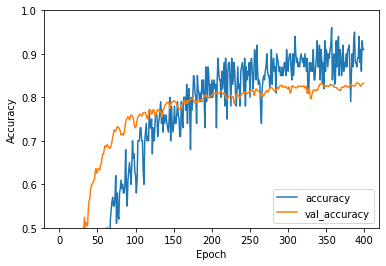

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train stats:', train_loss, train_acc)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test stats:', test_loss, test_acc)

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
